## Questions List 
#### corelation between btc and sp500
#### k_regeime parameter setting ( Negative number result)
#### Additional Model Trying 


In [ ]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas_datareader.data import DataReader
from datetime import datetime

import requests
from io import StringIO
from io import BytesIO

from matplotlib.pyplot import figure

In [ ]:
pip install statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Bitcoin Data:**

In [ ]:
#import dataset
response_btc = requests.get('https://docs.google.com/spreadsheets/d/1J3F1-OjCNr28bSjr4eBw3ywQaAAImKeFC2Kd-wNgBYo/export?format=csv')
assert response_btc.status_code == 200, 'Wrong status code'
data = response_btc.content
df_btc = pd.read_csv(BytesIO(data))
print(df_btc.shape)

(1794, 6)


In [ ]:
df_btc['Date'] = pd.to_datetime(df_btc['Date'])

#Check null value:
df_btc['Date'].isna().sum()

0

In [ ]:
df_btc

,Date,Open,High,Low,Close,Volume
0,2018-01-01 23:58:00,NaN,NaN,NaN,13480.01,NaN
1,2018-01-02 23:58:00,NaN,NaN,NaN,14781.51,NaN
2,2018-01-03 23:58:00,NaN,NaN,NaN,15098.14,NaN
3,2018-01-04 23:58:00,NaN,NaN,NaN,15144.99,NaN
4,2018-01-05 23:58:00,NaN,NaN,NaN,16960.01,NaN
...,...,...,...,...,...,...
1789,2022-11-25 23:58:00,NaN,NaN,NaN,16498.40,NaN
1790,2022-11-26 23:58:00,NaN,NaN,NaN,16452.20,NaN
1791,2022-11-27 23:58:00,NaN,NaN,NaN,16420.90,NaN
1792,2022-11-28 23:58:00,NaN,NaN,NaN,16206.20,NaN


In [ ]:
monthly_btc = df_btc.resample('W', label='right', 
                            closed='right', on='Date').sum().reset_index().sort_values(by='Date')
monthly_btc

,Date,Open,High,Low,Close,Volume
0,2018-01-07,0.0,0.0,0.0,108737.87,0.0
1,2018-01-14,0.0,0.0,0.0,99322.15,0.0
2,2018-01-21,0.0,0.0,0.0,83445.51,0.0
3,2018-01-28,0.0,0.0,0.0,78008.32,0.0
4,2018-02-04,0.0,0.0,0.0,66427.66,0.0
...,...,...,...,...,...,...
252,2022-11-06,0.0,0.0,0.0,144684.40,0.0
253,2022-11-13,0.0,0.0,0.0,122488.00,0.0
254,2022-11-20,0.0,0.0,0.0,116412.90,0.0
255,2022-11-27,0.0,0.0,0.0,114465.50,0.0


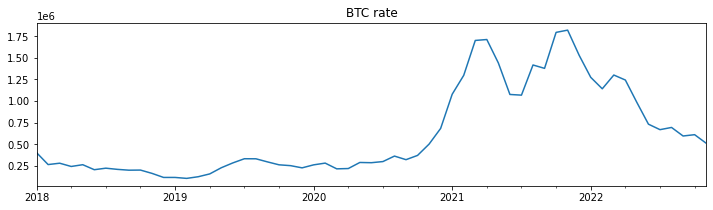

In [ ]:
from datetime import date, timedelta
import calendar
btc_list = monthly_btc['Close'].tolist()

#Draw the graph for S&P 500
date = datetime.now()
month = date.replace(day = calendar.monthrange(date.year, date.month)[1])
#d1 = today.strftime("%m/%d/%y")
btc_m = pd.Series(btc_list, index= pd.date_range("1/1/2018","11/30/2022", freq = "M"))
btc_m.plot(title="BTC rate", figsize= (12,3))


In [ ]:
# Build up Markov Regression model:
mod_btc = sm.tsa.MarkovRegression(btc_m, k_regimes = 3)
res_btc = mod_btc.fit()
res_btc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               MarkovRegression   Log Likelihood                -817.725
Date:                Fri, 02 Dec 2022   AIC                           1655.450
Time:                        22:33:03   BIC                           1676.225
Sample:                    01-31-2018   HQIC                          1663.560
                         - 11-30-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.872e+05   9.54e-08   3.01e+12      0.000    2.87e+05    2.87e+05
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.202e+05   1.66e-07   1.93e+12      0.000     3.2e+05     3.2e+05
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.223e+06   1.89e-08   6.46e+13      0.000    1.22e+06    1.22e+06
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.433e+10   3.27e-14   2.27e+24      0.000    7.43e+10    7.43e+10
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9751      0.034     28.535      0.000       0.908       1.042
p[1->0]        0.0574      0.111      0.515      0.607      -0.161       0.276
p[2->0]     1.523e-44        nan        nan        nan         nan         nan
p[0->1]     1.231e-12        nan        nan        nan         nan         nan
p[1->1]        0.9426      0.172      5.487      0.000       0.606       1.279
p[2->1]        0.0669      0.058      1.161      0.246      -0.046       0.180
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 2.19e+40. Standard errors may be unstable.
"""

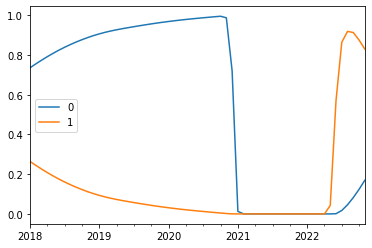

In [ ]:
# Show three regimes:
for i in range(2):
  res_btc.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
      
  plt.legend()

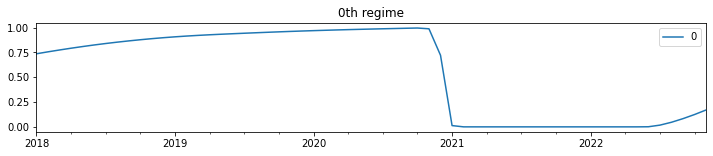

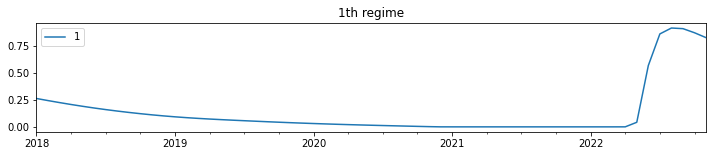

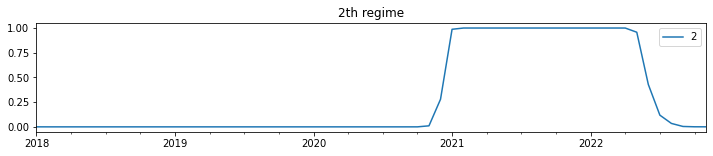

In [ ]:
# Show three regimes using smoothed marginal probabilities
for i in range(3):
  f, ax = plt.subplots(figsize=(12,2))
  res_btc.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
  ax.set_title(f"{i}th regime")
  plt.legend()
  plt.show()

In [ ]:
print(res_btc.expected_durations)

[40.1389645  17.41000053 14.9425508 ]


In [ ]:
for i in res_btc.expected_durations:
 print(f"{i/12} Year")

3.3449137079954028 Year
1.450833377321546 Year
1.245212566340642 Year


## **S&P 500:**

In [ ]:
# Import dataset
response_sp = requests.get('https://docs.google.com/spreadsheets/d/1Y8Yv2qW5DH8gzkg8pRprBFRZ1asl1sXtT2Wkd6T0nzk/export?format=csv')
assert response_sp.status_code == 200, 'Wrong status code'
data = response_sp.content
df_sp = pd.read_csv(BytesIO(data))
print(df_sp.shape)

(1237, 6)


In [ ]:
#Convert to dataframe:
df_sp['Date'] = pd.to_datetime(df_sp['Date'])

#Check null value:
df_sp['Date'].isna().sum()

0

In [ ]:
# Change data to weekly format
weekly_sp = df_sp.resample('W-Fri', label='right', 
                            closed='right', on='Date').sum().reset_index().sort_values(by='Date')
weekly_sp

,Date,Open,High,Low,Close,Volume
0,2018-01-05,10832.22,10883.00,10827.12,10876.01,0
1,2018-01-12,13762.52,13813.86,13743.94,13801.03,0
2,2018-01-19,11188.95,11230.74,11137.66,11187.31,0
3,2018-01-26,14183.35,14249.67,14140.64,14221.76,0
4,2018-02-02,14157.75,14192.51,14055.46,14083.88,0
...,...,...,...,...,...,...
252,2022-11-04,19136.77,19246.89,18872.65,18978.21,0
253,2022-11-11,19232.28,19451.36,19099.91,19332.78,0
254,2022-11-18,19846.85,19955.12,19706.43,19819.67,0
255,2022-11-25,15922.34,16035.68,15887.54,16006.90,0


In [ ]:
# Change data to Monthly format
monthly_sp = df_sp.resample('M', label='right', 
                            closed='right', on='Date').sum().reset_index().sort_values(by='Date')
monthly_sp

,Date,Open,High,Low,Close,Volume
0,2018-01-31,58499.42,58724.90,58332.15,58585.88,0
1,2018-02-28,51495.12,51986.08,50953.47,51397.95,0
2,2018-03-31,56865.06,57231.75,56386.29,56758.25,0
3,2018-04-30,55803.01,56134.23,55368.99,55726.13,0
4,2018-05-31,59355.84,59620.65,59102.58,59432.86,0
5,2018-06-30,57854.40,58051.62,57627.77,57841.41,0
6,2018-07-31,58577.24,58813.95,58420.45,58666.51,0
7,2018-08-31,65655.29,65883.31,65514.37,65729.87,0
8,2018-09-30,55129.83,55289.94,54981.17,55128.51,0
9,2018-10-31,64309.74,64696.34,63619.23,64065.69,0


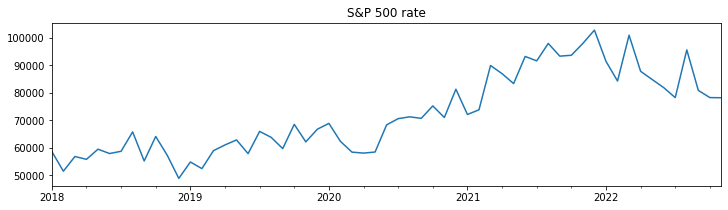

In [ ]:
from datetime import date, timedelta
import calendar
sp_list = monthly_sp['Close'].tolist()

#Draw the graph for S&P 500
date = datetime.now()
month = date.replace(day = calendar.monthrange(date.year, date.month)[1])
#d1 = today.strftime("%m/%d/%y")
sp_m = pd.Series(sp_list, index= pd.date_range("1/1/2018","11/30/2022", freq = "M"))
sp_m.plot(title="S&P 500 rate", figsize= (12,3))


In [ ]:
# print(55.85400626/4) 
# print(19.85506546/4)

In [ ]:
# Build up Markov model:
mod_sp = sm.tsa.MarkovRegression(sp_m, k_regimes = 3)
res_sp = mod_sp.fit()
res_sp.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: Es

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               MarkovRegression   Log Likelihood                -619.047
Date:                Fri, 02 Dec 2022   AIC                           1258.094
Time:                        22:42:51   BIC                           1278.869
Sample:                    01-31-2018   HQIC                          1266.204
                         - 11-30-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.893e+04   1837.262     32.072      0.000    5.53e+04    6.25e+04
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.091e+04   2382.297     25.568      0.000    5.62e+04    6.56e+04
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.183e+04   1494.033     54.773      0.000    7.89e+04    8.48e+04
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.895e+07      0.187   2.62e+08      0.000     4.9e+07     4.9e+07
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.4152      0.000    844.740      0.000       0.414       0.416
p[1->0]        0.9557      0.053     18.176      0.000       0.853       1.059
p[2->0]     1.034e-96        nan        nan        nan         nan         nan
p[0->1]        0.5848   3.28e-06   1.79e+05      0.000       0.585       0.585
p[1->1]             0        nan        nan        nan         nan         nan
p[2->1]        0.0179      0.022      0.811      0.417      -0.025       0.061
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 6.4e+23. Standard errors may be unstable.
"""

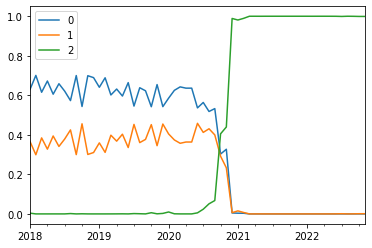

In [ ]:
# Show three regimes:
for i in range(3):
  res_sp.filtered_marginal_probabilities[i].plot(
      label = f'{i}'
  )
      
  plt.legend()

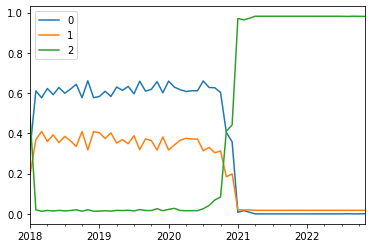

In [ ]:
# Show three regimes:
for i in range(3):
  res_sp.predicted_marginal_probabilities[i].plot(
      label = f'{i}'
  )
      
  plt.legend()

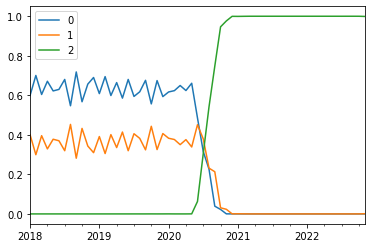

In [ ]:
# Show three regimes:
for i in range(3):
  res_sp.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
      
  plt.legend()

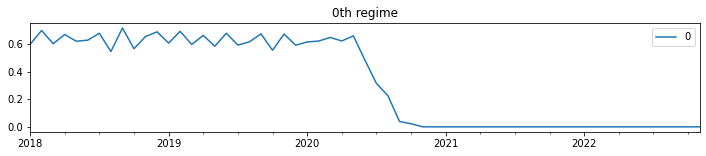

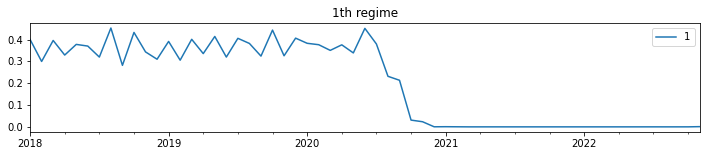

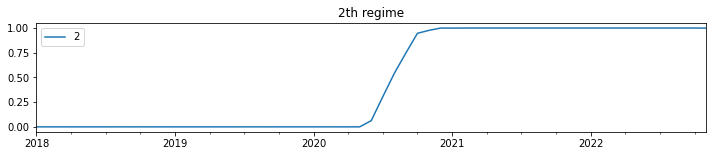

In [ ]:
for i in range(3):
  f, ax = plt.subplots(figsize=(12,2))
  res_sp.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
  ax.set_title(f"{i}th regime")
  plt.legend()
  plt.show()

In [ ]:
print(res_sp.expected_durations)

[ 1.70999045  1.         55.76183427]


In [ ]:
for i in res_sp.expected_durations:
 print(f"{i/12} Year")


0.14249920380593648 Year
0.08333333333333333 Year
4.646819522209639 Year


### ***Model with volatility:***

In [ ]:
# Make trend='n' and switching_variance=True
vola_sp = sm.tsa.MarkovRegression(sp_m, k_regimes = 3,trend='n', switching_trend=False, switching_exog=False, switching_variance=True)
vola_res_sp = vola_sp.fit()
vola_res_sp.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: Es

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               MarkovRegression   Log Likelihood                -744.910
Date:                Fri, 02 Dec 2022   AIC                           1507.820
Time:                        21:49:38   BIC                           1526.517
Sample:                    01-31-2018   HQIC                          1515.119
                         - 11-30-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.419e+09   1.37e-24   3.97e+33      0.000    5.42e+09    5.42e+09
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.419e+09    1.2e-11   4.52e+20      0.000    5.42e+09    5.42e+09
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       5.42e+09   2.76e-12   1.96e+21      0.000    5.42e+09    5.42e+09
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]         1e-20    232.649    4.3e-23      1.000    -455.984     455.984
p[1->0]         1e-20    1.5e-06   6.67e-15      1.000   -2.94e-06    2.94e-06
p[2->0]         1e-20        nan        nan        nan         nan         nan
p[0->1]        1.0000      3.181      0.314      0.753      -5.234       7.234
p[1->1]        0.0110      0.015      0.739      0.460      -0.018       0.040
p[2->1]        0.0011      3.845      0.000      1.000      -7.534       7.537
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 6.96e+58. Standard errors may be unstable.
"""

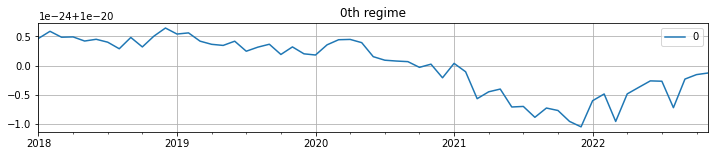

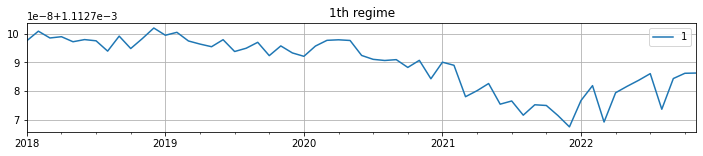

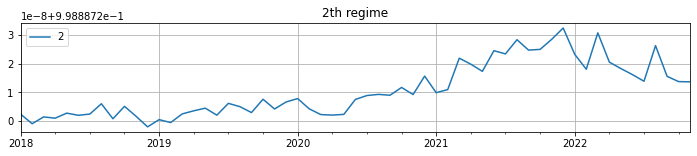

In [ ]:
for i in range(3):
  f, ax = plt.subplots(figsize=(12,2))
  vola_res_sp.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
  ax.set_title(f"{i}th regime")
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
print(1e-8+9.988872e-1 )

0.99888721


In [ ]:
print(1e-8+1.1127e-3)

0.00111271


0th regime's negative probability => could be numerical error 
covarience number could be huge


In [ ]:
fig, ax = plt.subplots(1, constrained_layout=True)
data_ret = data.resample('W').last().pct_change().dropna() * 100 # Get weekly returns in percent change
data_ret.plot(title='Excess returns', figsize=(12, 3), ax=ax)
ax.fill_between(usrec.index, ax.get_ylim()[0], ax.get_ylim()[1], where=usrec["USREC"].values, color="k", alpha=0.1)
# fig.tight_layout()

In [ ]:
print(vola_res_sp.expected_durations)

[  1.           1.01115803 907.65870486]


It's good to use k_regimes = 3 at this point. 
Not actually classifying as regime right now. 
All the probability is in regime => labling regimes is the next step
Labling Maximun probability Regime would be currently best idea. 

Probabilities time steps within the regime
1th, 2nd All the y values are 0. ( above there were only 3 liines  even though regime where 5) => didn't evene shouw up. So the three regimes would be optimal number. None zero (0th, 3th, 4th)  1th even though there are movement, y value is so small.

 reuse plotting code and the ideas i shared for volatility regime fitting. the only difference is you're fitting based on variance instead of the raw value trends. everything else is the same (regime probabilities, etc.)



This is fitting to local optimal.
The result is not significantly different with 5. But randomize process is needed? 

*****Explore why it's different.(with k_regime = 5) *******
ex) 4 or...3.. 5... 

Rerun multiple time to see if the results are different. (5 & 3) 
=> comes up with very different results. 

+ additionally we can figure it out, how they are different quantatively. 
(labeling...etc....) 



### *Model based on the volatility:* 
        #switching_trend=False, switching_exog=True, switching_variance=True,
        Do the resampling 
        USD- > Percentage change 
  
  
  ****** trend=’n’, switching_variance=True *******
  [link text](https://)

Switching intercept and lagged dependent variable

## **Taylor rule with 2 or 3 regimes**

Taylor-type rule with both 2 and 3 regimes to see which fits the data better. 
We employ a search over starting parameters to improve results, specifying 20 random search repetitions. 
* Seems like we have only 1 regime.

We now include two additional exogenous variables - a measure of the gap and a measure of inflation - into the S&P 500 data to estimate a switching Taylor-type rule with 3 regimes (which is better to fit in the data).

***Import inflation rate data csv file:***

In [ ]:
# Import inflation csv file
response = requests.get('https://docs.google.com/spreadsheets/d/17v0th71AL_VSSZeIBlsSi2rHEY6R6t_Or8os5GUW260/export?format=csv')
assert response.status_code == 200, 'Wrong status code'
data = response.content
inflation = pd.read_csv(BytesIO(data))
print(inflation.shape)

(237, 2)


In [ ]:
# Change date to formal format:
inflation['DATE'] = pd.to_datetime(inflation['DATE'])
inflation.head()

,DATE,T10YIEM
0,2003-01-01,1.76
1,2003-02-01,1.91
2,2003-03-01,1.87
3,2003-04-01,1.78
4,2003-05-01,1.66


In [ ]:
# Select only inflation rate from January 2018 to June 2022:
inflation_new = inflation.loc[inflation['DATE']>"2017-12-01"][inflation['DATE']<"2022-8-01"]
inflation_new.head()

<ipython-input-27-f553f05faf39>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inflation_new = inflation.loc[inflation['DATE']>"2017-12-01"][inflation['DATE']<"2022-8-01"]


,DATE,T10YIEM
180,2018-01-01,2.04
181,2018-02-01,2.10
182,2018-03-01,2.09
183,2018-04-01,2.13
184,2018-05-01,2.14


***Change the S&P 500 data into monthly format:***

In [ ]:
# Convert daily s&p data into monthly:
monthly_sp = df_sp.resample('M', label='right', 
                            closed='right', on='Date').sum().reset_index().sort_values(by='Date')
# Drop 2022-10-30 data because the inflation rate did not come out yet.
monthly_sp = monthly_sp.drop(labels=[55,56,57,58],axis=0)
monthly_sp.head()

,Date,Open,High,Low,Close,Volume
0,2018-01-31,58499.42,58724.90,58332.15,58585.88,47016764084
1,2018-02-28,51495.12,51986.08,50952.92,51397.95,49680991803
2,2018-03-31,56865.06,57231.75,56386.29,56758.25,49520702567
3,2018-04-30,55803.01,56134.23,55368.99,55726.13,44339282806
4,2018-05-31,59355.84,59620.65,59102.58,59432.86,44387501398


In [ ]:
#Make the monthly sp data into list
sp_listm = monthly_sp['Close'].tolist()

sp = pd.Series(sp_listm, index= pd.date_range("1/1/2018",'07/31/2022', freq = "M"))

***Import GDP csv file and change it to monthly format:***

In [ ]:
# Import GDP csv file
response = requests.get('https://docs.google.com/spreadsheets/d/1tYgpA_dlxhMhbaRZ2wxuQA8TIox-h3vAPn_Yd01kgLA/export?format=csv')
assert response.status_code == 200, 'Wrong status code'
data = response.content
gdp = pd.read_csv(BytesIO(data))
print(gdp.shape)

(303, 2)


In [ ]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'])

# Select data from 2018 to 2022:
gdp_new = gdp.loc[gdp['DATE']>"2017-12-01"][gdp['DATE']<"2022-08-01"]
gdp_new.head()

<ipython-input-31-291781a0acd0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp_new = gdp.loc[gdp['DATE']>"2017-12-01"][gdp['DATE']<"2022-08-01"]


,DATE,GDP
284,2018-01-01,20155.486
285,2018-04-01,20470.197
286,2018-07-01,20687.278
287,2018-10-01,20819.269
288,2019-01-01,21013.085


In [ ]:
gdp_new['DATE'] = pd.to_datetime(gdp['DATE']).dt.to_period('M')

# Change the quarterly data to monthly and use interpolate method to fill in the null data using linear calculation method
monthly_gdp = gdp_new.set_index('DATE').resample('M').interpolate(method='linear')
monthly_gdp = monthly_gdp.reset_index()
monthly_gdp.head()

,DATE,GDP
0,2018-01,20155.486000
1,2018-02,20260.389667
2,2018-03,20365.293333
3,2018-04,20470.197000
4,2018-05,20542.557333


In [ ]:
gdp_list = monthly_gdp['GDP'].tolist()
inflation_list = inflation_new['T10YIEM'].tolist()

gdp = pd.Series(gdp_list, index= pd.date_range("1/1/2018",'08/01/2022', freq = "M"))
inflation = pd.Series(inflation_list, index= pd.date_range("1/1/2018",'08/01/2022', freq = "M"))

In [ ]:
# Combine s&p 500, gdp, and inflation data:
exog = pd.concat((sp.shift(), gdp, inflation), axis=1).iloc[1:]
exog.head()

,0,1,2
2018-02-28,58585.88,20260.389667,2.10
2018-03-31,51397.95,20365.293333,2.09
2018-04-30,56758.25,20470.197000,2.13
2018-05-31,55726.13,20542.557333,2.14
2018-06-30,59432.86,20614.917667,2.12


In [ ]:
# Build up the model using taylor rule
mod_taylor = sm.tsa.MarkovRegression(sp.iloc[1:], k_regimes=3, exog=exog)
res_taylor = mod_taylor.fit()
res_taylor.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: Es

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                   54
Model:               MarkovRegression   Log Likelihood                -547.266
Date:                Fri, 02 Dec 2022   AIC                           1132.532
Time:                        22:58:05   BIC                           1170.323
Sample:                    02-28-2018   HQIC                          1147.106
                         - 07-31-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.97e+05      0.002  -2.24e+08      0.000   -4.97e+05   -4.97e+05
x1            -0.1552    147.640     -0.001      0.999    -289.525     289.215
x2            22.7162     48.257      0.471      0.638     -71.865     117.298
x3          4.553e+04      0.003   1.33e+07      0.000    4.55e+04    4.55e+04
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.524e+04      0.067  -3.77e+05      0.000   -2.52e+04   -2.52e+04
x1             0.5355    294.064      0.002      0.999    -575.819     576.890
x2             2.8635    997.819      0.003      0.998   -1952.825    1958.552
x3         -4369.0729      0.025  -1.78e+05      0.000   -4369.121   -4369.025
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.12e+04    188.124   -165.848      0.000   -3.16e+04   -3.08e+04
x1             0.6355      0.087      7.266      0.000       0.464       0.807
x2             2.5714      0.292      8.810      0.000       1.999       3.143
x3           275.4024   2741.000      0.100      0.920   -5096.858    5647.663
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.718e+07   6.99e-06   5.32e+12      0.000    3.72e+07    3.72e+07
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     8.463e-10     32.470   2.61e-11      1.000     -63.640      63.640
p[1->0]     1.321e-11      0.015   9.02e-10      1.000      -0.029       0.029
p[2->0]      3.03e-17   3.71e-07   8.16e-11      1.000   -7.28e-07    7.28e-07
p[0->1]        1.0000    113.869      0.009      0.993    -222.179     224.179
p[1->1]        0.0339     19.301      0.002      0.999     -37.795      37.863
p[2->1]     1.383e-07        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differ

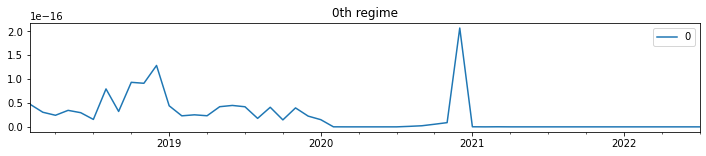

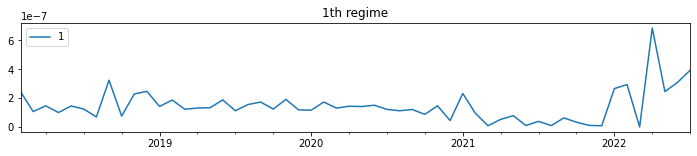

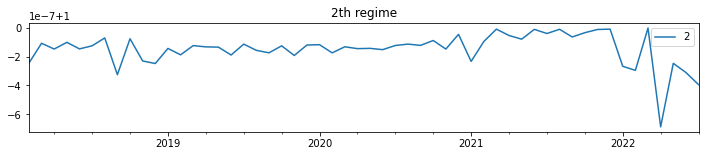

In [ ]:
for i in range(3):
  f, ax = plt.subplots(figsize=(12,2))
  res_taylor.smoothed_marginal_probabilities[i].plot(
      label = f'{i}'
  )
  ax.set_title(f"{i}th regime")
  plt.legend()
  plt.show()

In [ ]:
print(res_taylor.expected_durations)

[1.00000000e+00 1.03514144e+00 7.23182446e+06]


In [ ]:
print(res_taylor.expected_durations /12)

[8.33333334e-02 8.62617870e-02 6.02652038e+05]


## Using RNN Model

Making RNN model predicting S&P 500 Data 


In [ ]:
weekkly_btc = df_btc.resample('W', label='right', 
                            closed='right', on='Date').sum().reset_index().sort_values(by='Date')
weekly_btc

In [ ]:
weekkly_sp = df_sp.resample('W', label='right', 
                            closed='right', on='Date').sum().reset_index().sort_values(by='Date')
weekly_sp

,Date,Open,High,Low,Close,Volume
0,2018-01-05,10832.22,10883.00,10827.12,10876.01,8348700144
1,2018-01-12,13762.52,13813.86,13743.94,13801.03,10184949119
2,2018-01-19,11188.95,11230.74,11137.66,11187.31,9766828877
3,2018-01-26,14183.35,14249.67,14140.64,14221.76,11311257893
4,2018-02-02,14157.75,14192.51,14055.46,14083.88,12592819297
...,...,...,...,...,...,...
252,2022-11-04,19136.77,19246.89,18872.65,18978.21,14423496557
253,2022-11-11,19232.28,19451.36,19099.91,19332.78,14016474560
254,2022-11-18,19846.85,19955.12,19706.43,19819.67,12248780417
255,2022-11-25,15945.38,16035.68,15909.64,16006.90,6769708993


In [ ]:
weekly_sp['Date'] = pd.to_datetime(weekly_sp['Date'])
weekly_sp

,Date,Open,High,Low,Close,Volume
0,2018-01-05,10832.22,10883.00,10827.12,10876.01,8348700144
1,2018-01-12,13762.52,13813.86,13743.94,13801.03,10184949119
2,2018-01-19,11188.95,11230.74,11137.66,11187.31,9766828877
3,2018-01-26,14183.35,14249.67,14140.64,14221.76,11311257893
4,2018-02-02,14157.75,14192.51,14055.46,14083.88,12592819297
...,...,...,...,...,...,...
252,2022-11-04,19136.77,19246.89,18872.65,18978.21,14423496557
253,2022-11-11,19232.28,19451.36,19099.91,19332.78,14016474560
254,2022-11-18,19846.85,19955.12,19706.43,19819.67,12248780417
255,2022-11-25,15945.38,16035.68,15909.64,16006.90,6769708993


In [ ]:
record = weekly_sp.loc[:,['Close']].values
record.shape

(257, 1)

In [ ]:
training, test = record[:204,:], record[204:, :]

In [ ]:
from tensorflow import keras

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
record_scaled = scaler.fit_transform(training)
record_scaled.shape

(204, 1)

In [ ]:
n_steps = 10
X_train=[]
y_train=[]
for i in range(n_steps, 204):
    X_train.append(record_scaled[i-n_steps:i, 0])
    y_train.append(record_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

In [ ]:
X_train.shape, y_train.shape

((194, 10, 1), (194, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#declaire model and adding layers
model = keras.models.Sequential()

model.add(keras.layers.SimpleRNN(10, return_sequences = True, activation = "tanh", input_shape= (X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(keras.layers.SimpleRNN(10, return_sequences = True,activation = "tanh"))
model.add(Dropout(0.2))
model.add(keras.layers.SimpleRNN(10, return_sequences = True,activation = "tanh"))
model.add(Dropout(0.2))
model.add(keras.layers.SimpleRNN(10))
model.add(Dropout(0.2))
model.add(Dense(units =1))



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 10, 10)            120       
                                                                 
 dropout_6 (Dropout)         (None, 10, 10)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 10, 10)            210       
                                                                 
 dropout_7 (Dropout)         (None, 10, 10)            0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 10, 10)            210       
                                                                 
 dropout_8 (Dropout)         (None, 10, 10)            0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 10)               

In [ ]:
#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

#Fitting the model to train set
history = model.fit(X_train, y_train, epochs = 30, batch_size= 10)

Epoch 1/30
20/20 [==============================] - 3s 10ms/step - loss: 261316336.0000 - accuracy: 0.0000e+00
Epoch 2/30
20/20 [==============================] - 0s 10ms/step - loss: 261291168.0000 - accuracy: 0.0000e+00
Epoch 3/30
20/20 [==============================] - 0s 10ms/step - loss: 261274368.0000 - accuracy: 0.0000e+00
Epoch 4/30
20/20 [==============================] - 0s 10ms/step - loss: 261258976.0000 - accuracy: 0.0000e+00
Epoch 5/30
20/20 [==============================] - 0s 11ms/step - loss: 261248944.0000 - accuracy: 0.0000e+00
Epoch 6/30
20/20 [==============================] - 0s 11ms/step - loss: 261238496.0000 - accuracy: 0.0000e+00
Epoch 7/30
20/20 [==============================] - 0s 11ms/step - loss: 261222128.0000 - accuracy: 0.0000e+00
Epoch 8/30
20/20 [==============================] - 0s 11ms/step - loss: 261216608.0000 - accuracy: 0.0000e+00
Epoch 9/30
20/20 [==============================] - 0s 11ms/step - loss: 261201984.0000 - accuracy: 0.0000e+00
E

In [ ]:
history.history["loss"]

[0.6204767227172852,
 0.42401114106178284,
 0.4174595773220062,
 0.34069159626960754,
 0.2823728919029236,
 0.26606523990631104,
 0.24098388850688934,
 0.28076285123825073,
 0.15846435725688934,
 0.22468310594558716,
 0.17060914635658264,
 0.16040323674678802,
 0.21781717240810394,
 0.1644486039876938,
 0.1739918440580368,
 0.1318991780281067,
 0.13259585201740265,
 0.13326512277126312,
 0.11044728755950928,
 0.1285540759563446,
 0.11179178953170776,
 0.11273664981126785,
 0.1195015236735344,
 0.08793506771326065,
 0.10393809527158737,
 0.1005164161324501,
 0.06906433403491974,
 0.09787500649690628,
 0.06855913996696472,
 0.08032121509313583]

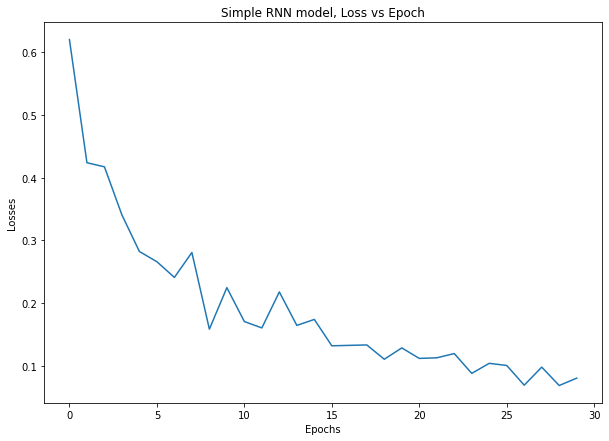

In [ ]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

In [ ]:
y_pred = model.predict(X_train)
y_pred = scaler.inverse_transform(y_pred )
y_pred.shape

7/7 [==============================] - 1s 5ms/step


(194, 1)

In [ ]:
y_pred.shape

(194, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train)

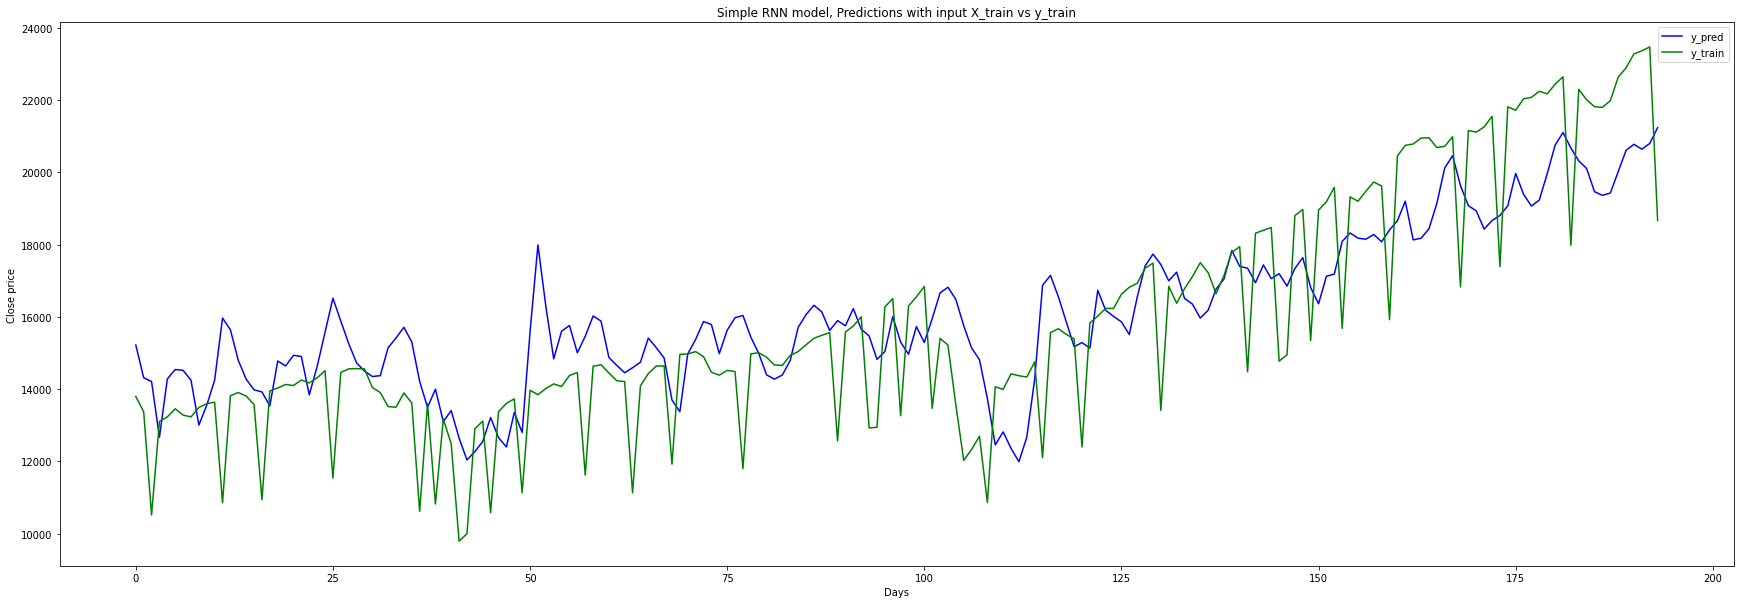

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

## Test 

In [ ]:
#record_all = pd.concat((weekly_sp['Close'], weekly_btc['Close']), axis = 0)
inputs = test.reshape(-1, 1)
# drop the latest 
#input_len = len(inputs[0])
#inputs= inputs[:input_len-2, :]

In [ ]:
inputs

array([[22850.84],
       [23359.1 ],
       [23302.22],
       [18639.6 ],
       [23915.51],
       [23663.76],
       [23431.59],
       [17990.54],
       [21874.87],
       [22629.44],
       [22515.31],
       [22076.88],
       [17203.61],
       [21759.1 ],
       [21113.5 ],
       [21668.21],
       [22492.25],
       [22885.84],
       [22577.4 ],
       [17649.16],
       [21978.79],
       [21074.71],
       [20901.24],
       [19881.44],
       [19822.69],
       [20110.04],
       [16518.74],
       [20316.56],
       [18616.71],
       [15232.15],
       [19151.2 ],
       [15478.47],
       [19128.55],
       [19688.02],
       [20114.22],
       [20662.12],
       [20960.19],
       [21388.6 ],
       [20664.27],
       [19862.88],
       [15961.6 ],
       [19763.79],
       [18996.97],
       [18247.46],
       [18636.82],
       [18031.24],
       [18511.62],
       [19195.41],
       [18978.21],
       [19332.78],
       [19819.67],
       [16006.9 ],
       [ 792

In [ ]:
inputs = scaler.transform(inputs)


In [ ]:
inputs.shape[0]
length = inputs.shape[0]
length

53

In [ ]:
X_test = []
y_test = []
for i in range(n_steps, length):
    X_test.append(inputs[i-n_steps:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
#When dealing with time series (and other types of sequences such as sentences), 
#the input features are generally represented as 3D arrays of shape [batch size, time steps, dimensionality], 
#where dimensionality is 1 for univariate time series and more for multi‐ variate time series.

In [ ]:
X_test.shape, y_test.shape

((43, 10), (43,))

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (-1,1))
X_test.shape, y_test.shape

((43, 10, 1), (43, 1))

In [ ]:
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

print('---------- Evaluation on Test Data ----------')
print("MSE: ", mean_squared_error(y_test, test_predict))
print("")

---------- Evaluation on Test Data ----------
MSE:  0.037465184469747226



In [ ]:
test_predict = scaler.inverse_transform(test_predict)
test_predict.shape

(43, 1)

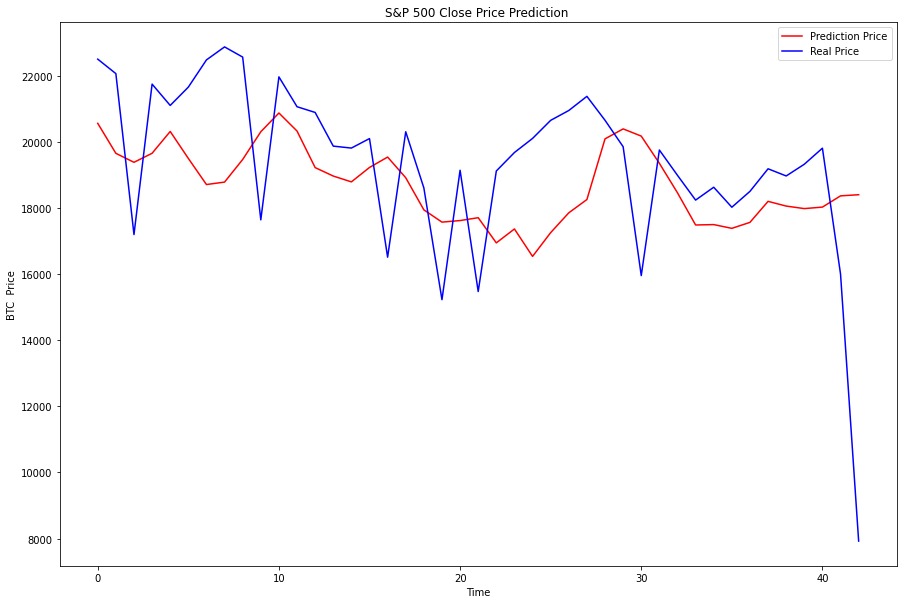

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(test_predict , color = 'red', label = 'Prediction Price')
plt.plot(scaler.inverse_transform(y_test) , color = 'blue', label = 'Real Price')
plt.title('S&P 500 Close Price Prediction ')
plt.xlabel('Time')
plt.ylabel('BTC  Price')
plt.legend()
plt.show()

In [ ]:
training.shape, inputs.shape 

((204, 1), (53, 1))

In [ ]:
weekly_sp.loc[:204,].Date


0     2018-01-05
1     2018-01-12
2     2018-01-19
3     2018-01-26
4     2018-02-02
         ...    
200   2021-11-05
201   2021-11-12
202   2021-11-19
203   2021-11-26
204   2021-12-03
Name: Date, Length: 205, dtype: datetime64[ns]

In [ ]:
weekly_sp.loc[:204,].Date.iloc[n_steps:].shape

(195,)

In [ ]:
y_flat = y_pred.ravel()

In [ ]:
test_y_flat = test_predict.ravel()

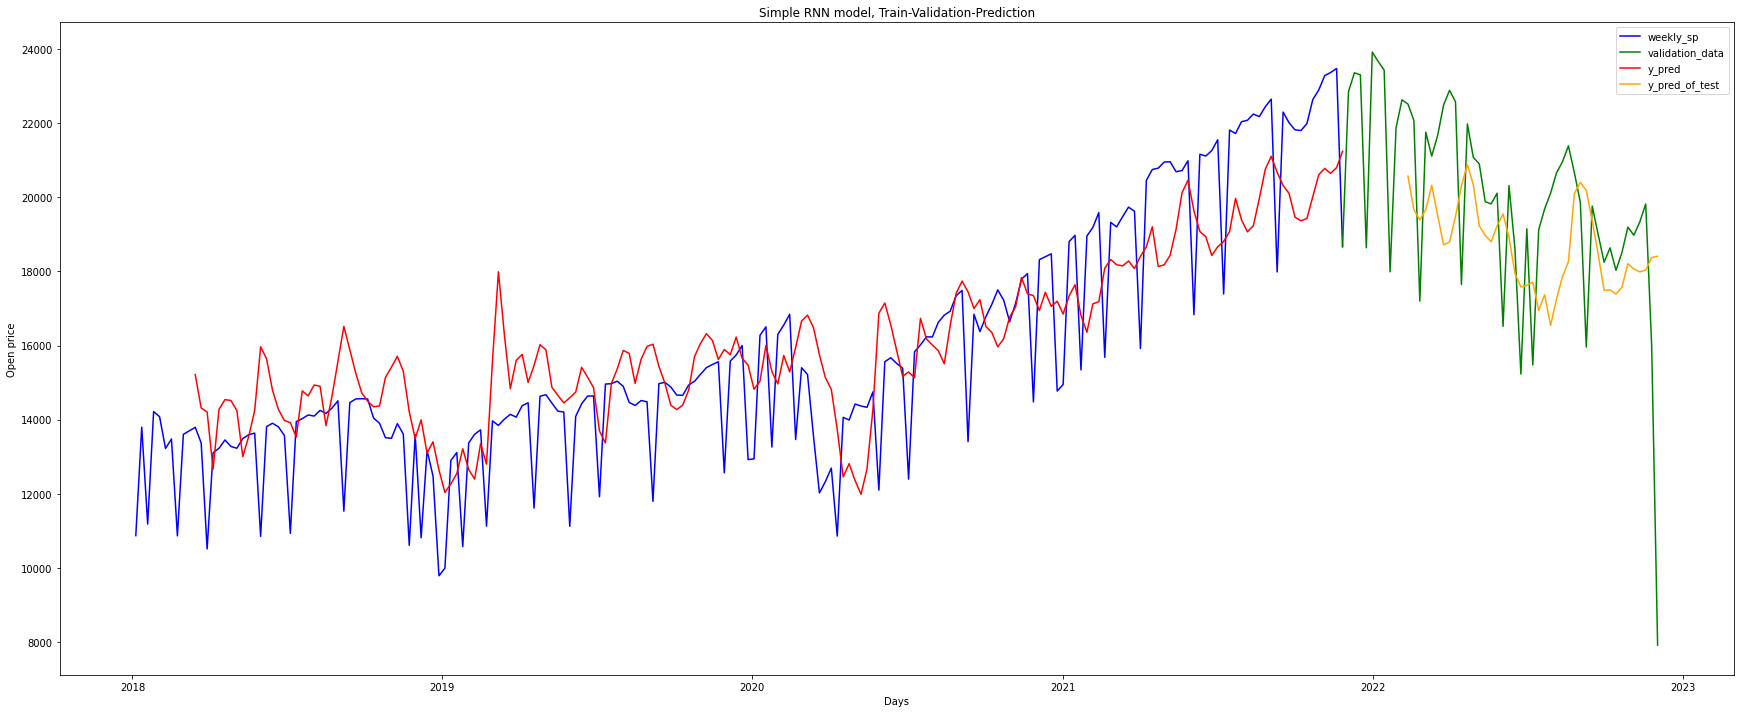

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(weekly_sp.loc[:203,].Date, weekly_sp.loc[:203,['Close']], label = "weekly_sp", color = "b")
plt.plot(weekly_sp.loc[203:,].Date, weekly_sp.loc[203:,['Close']],label = "validation_data", color = "g")
plt.plot(weekly_sp.loc[:203,].Date.iloc[n_steps:], y_flat, label = "y_pred", color = "r")
plt.plot(weekly_sp.loc[204:,].Date.iloc[n_steps:], test_y_flat, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()